In [25]:
import os
import sys

sys.path.append('/root/diffuser_chain_hd')


import json
import numpy as np
from os.path import join
import pdb

from diffuser.guides.policies import Policy
import diffuser.datasets as datasets
import diffuser.utils as utils


In [26]:
env = datasets.load_environment('maze2d-large-v1')

In [27]:
observation = env.reset()

In [28]:
import matplotlib.pyplot as plt 
from diffuser.utils.rendering import Maze2dRenderer

In [29]:
Maze2dRenderer('maze2d-large-v1')

In [9]:
# _background = maze_map == 1

# fig, axs = plt.subplots(2,1, figsize=(20,10))
# for i in range(2):
#     row = i // 1
#     axs[row].imshow(
#         _background * 0.5,
#         cmap=plt.cm.binary,
#         vmin=0,
#         vmax=1,
#     )
#     axs[row].set_xticks(np.arange(0,24,1))
#     axs[row].set_yticks(np.arange(0,18,1))
#     axs[row].grid(True)



# num_samples = 10
# colors = plt.cm.jet(np.linspace(0, 1, num_samples))
# colors_dist = plt.cm.Greens(np.linspace(0, 1, mx_dist))

# for i in range(num_samples):
#     idx = np.random.randint(0, len(all_sg_pairs))
#     s, g = all_sg_pairs[idx]['reset_cell'], all_sg_pairs[idx]['goal_cell'] 
#     dist = dist_map[hash_fn(s, g)]

#     axs[0].scatter(g[1], g[0], color=colors[i], s=100, marker='X', zorder=20, edgecolors='black', label='goal')
#     axs[0].scatter(g[1], g[0], color=colors_dist[dist], s=250, marker='X', zorder=10, edgecolors='black', label='goal')

#     axs[1].scatter(s[1], s[0], color=colors[i], s=50, zorder=30, edgecolors='black', label='reset')    
#     axs[1].scatter(s[1], s[0], color=colors_dist[dist], s=200, zorder=20, edgecolors='black', label='reset')
    
#     # axs[2].scatter(s[1], s[0], color=colors_dist[dist], s=50, zorder=30, edgecolors='black', label='reset')
#     # axs[2].scatter(g[1], g[0], color=colors_dist[dist], s=100, marker='X', zorder=20, edgecolors='black', label='goal')
    
# axs[0].set_title('goal')
# axs[1].set_title('reset')
# plt.show()    
# plt.tight_layout()

AttributeError: 'MazeEnv' object has no attribute 'maze'

In [30]:
MAZE_BOUNDS = {
    "maze2d-umaze-v1": (0, 5, 0, 5),
    "maze2d-medium-v1": (0, 8, 0, 8),
    "maze2d-large-v1": (0, 9, 0, 12),
}


import os
import collections
import numpy as np
import gym
import pdb

from contextlib import (
    contextmanager,
    redirect_stderr,
    redirect_stdout,
)

@contextmanager
def suppress_output():
    """
        A context manager that redirects stdout and stderr to devnull
        https://stackoverflow.com/a/52442331
    """
    with open(os.devnull, 'w') as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield (err, out)

with suppress_output():
    ## d4rl prints out a variety of warnings
    import d4rl
def load_environment(name):
    if type(name) != str:
        ## name is already an environment
        return name
    with suppress_output():
        wrapped_env = gym.make(name)
    env = wrapped_env.unwrapped
    env.max_episode_steps = wrapped_env._max_episode_steps
    env.name = name
    return env


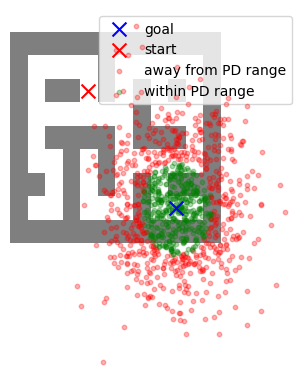

In [117]:



env_name = env
_background = env.maze_arr == 10
observation_dim = np.prod(env.observation_space.shape)
action_dim = np.prod(env.action_space.shape)
goal = None
_remove_margins = False
_extent = (0, 1, 1, 0)


plt.imshow(
    _background * 0.5,
    extent=_extent,
    cmap=plt.cm.binary,
    vmin=0,
    vmax=1,
)

# path_length = len(observations)
# colors = plt.cm.jet(np.linspace(0, 1, path_length))
# plt.plot(observations[:, 1], observations[:, 0], c="black", zorder=10)
# plt.scatter(observations[:, 1], observations[:, 0], c=colors, zorder=20)
plt.axis("off")
# plt.title(title)



def obs4render(observations):
    observations = observations.copy()
    bounds = MAZE_BOUNDS['maze2d-large-v1']

    observations = observations + 0.5
    if len(bounds) == 2:
        _, scale = bounds
        observations /= scale
    elif len(bounds) == 4:
        _, iscale, _, jscale = bounds
        observations[:, 0] /= iscale
        observations[:, 1] /= jscale
    return observations

_target = np.array([env._target])
target = obs4render(_target)
plt.scatter(target[:, 1], target[:, 0], marker="x", s=100, c="blue", zorder=30, label="goal")

obs = obs4render(np.array([observation[:2]]))
plt.scatter(obs[:, 1], obs[:, 0], marker="x", s=100, c="red", zorder=30, label="start")

distance_threshold = 2
for i in range(10):
    neighbors = np.random.randn(100,2)*2 + _target
    target_goal_dist = np.linalg.norm(neighbors - _target, axis=1)
    _qualified_neighbors = neighbors[target_goal_dist > distance_threshold]
#     print(f"plot: {len(_qualified_neighbors)}")
    qualified_neighbors = obs4render(_qualified_neighbors)
    if i == 0: plt.scatter(qualified_neighbors[:,1], qualified_neighbors[:,0], s=10, c='r', alpha=0.3, zorder=10, label='away from PD range')
    else: plt.scatter(qualified_neighbors[:,1], qualified_neighbors[:,0], s=10, c='r', alpha=0.3, zorder=10)#, label='away from PD range')

        
    _qualified_neighbors = neighbors[target_goal_dist <= distance_threshold]
    qualified_neighbors = obs4render(_qualified_neighbors)
    if i == 0: plt.scatter(qualified_neighbors[:,1], qualified_neighbors[:,0], s=10, c='g', alpha=0.3, zorder=10, label='within PD range')
    else: plt.scatter(qualified_neighbors[:,1], qualified_neighbors[:,0], s=10, c='g', alpha=0.3, zorder=10)#, label='within PD range')

plt.legend()    
plt.show()

In [108]:
env._target

(7, 9)

In [113]:
np.linalg.norm(observation[:2] - env._target)

7.118601032023483

In [107]:
observation[:2]

array([1.97400886, 3.95878053])

In [101]:
target

array([[0.83333333, 0.79166667]])